In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('final_food_delivery_dataset.csv')
df.sample(7)

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
8646,8647,260,237,07-07-2023,988.03,Grand Restaurant South Indian,User_260,Bangalore,Regular,Restaurant_237,Italian,4.5
2133,2134,727,139,12-01-2023,945.16,Ruchi Cafe South Indian,User_727,Pune,Regular,Restaurant_139,Mexican,4.8
7390,7391,1009,426,04-04-2023,312.45,Royal Foods Non-Veg,User_1009,Pune,Regular,Restaurant_426,Chinese,3.5
4399,4400,556,498,01-03-2023,762.17,Darbar Tiffins Non-Veg,User_556,Chennai,Regular,Restaurant_498,Chinese,3.9
8944,8945,769,457,01-10-2023,946.97,Sai Delights Multicuisine,User_769,Hyderabad,Regular,Restaurant_457,Indian,3.0
862,863,1140,34,11-06-2023,750.02,Ruchi Dhaba Multicuisine,User_1140,Hyderabad,Regular,Restaurant_34,Chinese,4.3
1363,1364,265,49,15-05-2023,735.53,Amma Curry House Punjabi,User_265,Chennai,Regular,Restaurant_49,Italian,4.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [19]:
df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

# Question 1: Total Revenue from Gold members by City

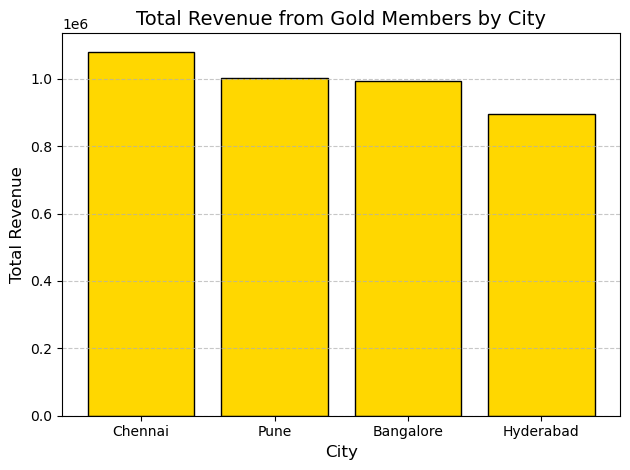

In [4]:
gold_df = df[df['membership'] == 'Gold']
revenue_by_city = gold_df.groupby('city')['total_amount'].sum().sort_values(ascending=False).reset_index()

plt.bar(revenue_by_city['city'], revenue_by_city['total_amount'], color='gold', edgecolor='black')
plt.title('Total Revenue from Gold Members by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Question 2: Average Order Value by Cuisine

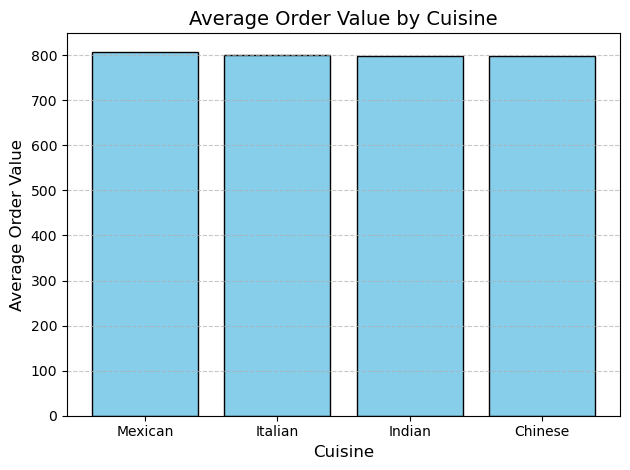

In [5]:
avg_order_value = df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False).reset_index()

plt.bar(avg_order_value['cuisine'], avg_order_value['total_amount'], color='skyblue', edgecolor='black')
plt.title('Average Order Value by Cuisine', fontsize=14)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Question 3: How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?

Number of distinct users with total spending > 1000: 2544


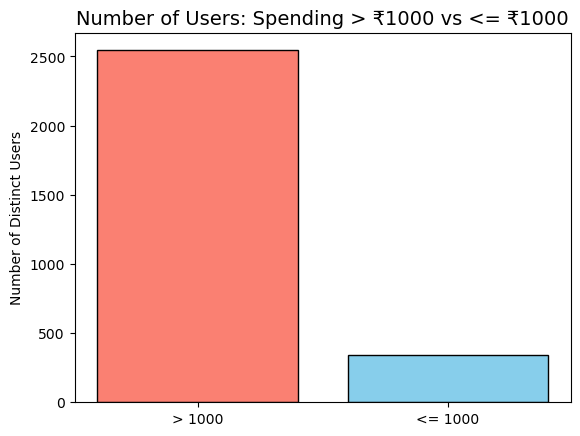

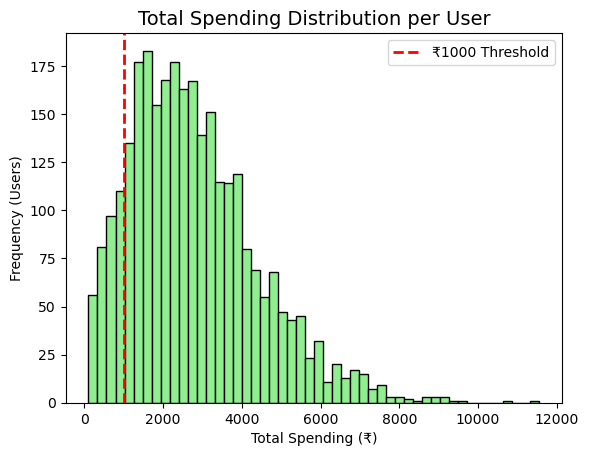

In [6]:
user_spending = df.groupby('user_id')['total_amount'].sum().reset_index()
users_above_1000 = user_spending[user_spending['total_amount'] > 1000]
count_above_1000 = len(users_above_1000)
print(f"Number of distinct users with total spending > 1000: {count_above_1000}")

user_spending['Category'] = user_spending['total_amount'].apply(lambda x: '> 1000' if x > 1000 else '<= 1000')
category_counts = user_spending['Category'].value_counts()

plt.bar(category_counts.index, category_counts.values, color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Number of Users: Spending > ₹1000 vs <= ₹1000', fontsize=14)
plt.ylabel('Number of Distinct Users')
plt.show()

plt.hist(user_spending['total_amount'], bins=50, color='lightgreen', edgecolor='black')
plt.axvline(1000, color='red', linestyle='dashed', linewidth=2, label='₹1000 Threshold')
plt.title('Total Spending Distribution per User', fontsize=14)
plt.xlabel('Total Spending (₹)')
plt.ylabel('Frequency (Users)')
plt.legend()
plt.show()

# Question 4: Which restaurant rating range generated the highest total revenue?

C:\Users\oshah\AppData\Local\Temp\ipykernel_68544\283921002.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating = df.groupby('rating_range')['total_amount'].sum().reset_index()


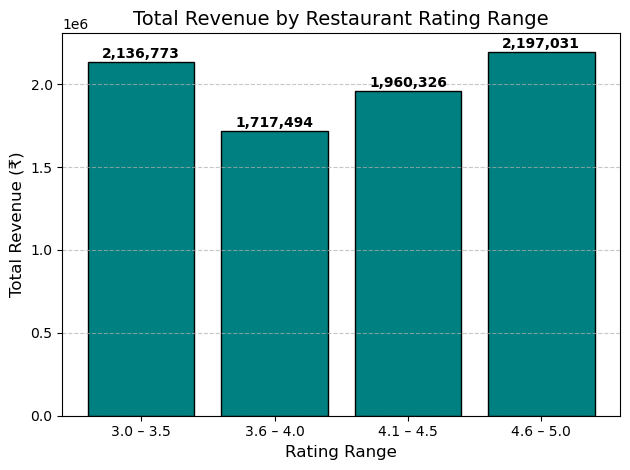

  rating_range  total_amount
0    3.0 – 3.5    2136772.70
1    3.6 – 4.0    1717494.41
2    4.1 – 4.5    1960326.26
3    4.6 – 5.0    2197030.75


In [7]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['3.0 – 3.5', '3.6 – 4.0', '4.1 – 4.5', '4.6 – 5.0']

df['rating_range'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)
revenue_by_rating = df.groupby('rating_range')['total_amount'].sum().reset_index()

plt.bar(revenue_by_rating['rating_range'], revenue_by_rating['total_amount'], color='teal', edgecolor='black')
plt.title('Total Revenue by Restaurant Rating Range', fontsize=14)
plt.xlabel('Rating Range', fontsize=12)
plt.ylabel('Total Revenue (₹)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(revenue_by_rating['total_amount']):
    plt.text(i, val + 5000, f'{val:,.0f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

print(revenue_by_rating)

# Question 5: Among Gold members, which city has the highest average order value?

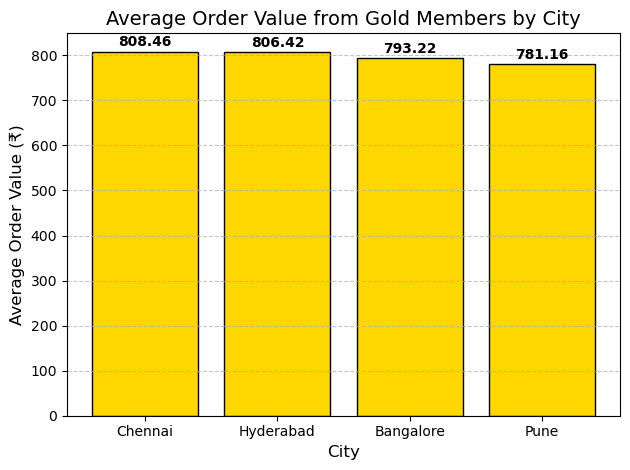

        city  total_amount
0    Chennai    808.459080
1  Hyderabad    806.421034
2  Bangalore    793.223756
3       Pune    781.162243


In [8]:
gold_df = df[df['membership'] == 'Gold']
avg_order_gold = gold_df.groupby('city')['total_amount'].mean().sort_values(ascending=False).reset_index()

plt.bar(avg_order_gold['city'], avg_order_gold['total_amount'], color='gold', edgecolor='black')
plt.title('Average Order Value from Gold Members by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Order Value (₹)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(avg_order_gold['total_amount']):
    plt.text(i, val + 5, f'{val:.2f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

print(avg_order_gold)

# Question 6: Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?

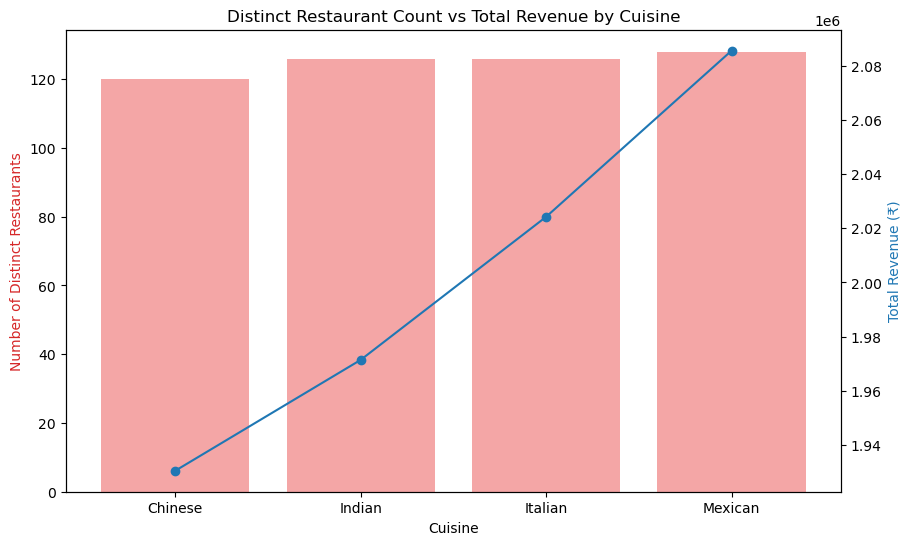

   cuisine  distinct_restaurant_count  total_revenue
0  Chinese                        120     1930504.65
1   Indian                        126     1971412.58
2  Italian                        126     2024203.80
3  Mexican                        128     2085503.09


In [11]:
restaurant_counts = df.groupby('cuisine')['restaurant_id'].nunique().reset_index()
restaurant_counts.columns = ['cuisine', 'distinct_restaurant_count']

cuisine_revenue = df.groupby('cuisine')['total_amount'].sum().reset_index()
cuisine_revenue.columns = ['cuisine', 'total_revenue']
cuisine_stats = pd.merge(restaurant_counts, cuisine_revenue, on='cuisine').sort_values(by='distinct_restaurant_count')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(cuisine_stats['cuisine'], cuisine_stats['distinct_restaurant_count'], color='lightcoral', alpha=0.7, label='Distinct Restaurants')
ax1.set_xlabel('Cuisine')
ax1.set_ylabel('Number of Distinct Restaurants', color='tab:red')

ax2 = ax1.twinx()
ax2.plot(cuisine_stats['cuisine'], cuisine_stats['total_revenue'], color='tab:blue', marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue (₹)', color='tab:blue')
plt.title('Distinct Restaurant Count vs Total Revenue by Cuisine')
plt.show()

print(cuisine_stats)

# Question 7: What percentage of total orders were placed by Gold members? (Rounded to nearest integer)

Percentage of Gold Orders: 49.87%
Rounded Percentage: 50%


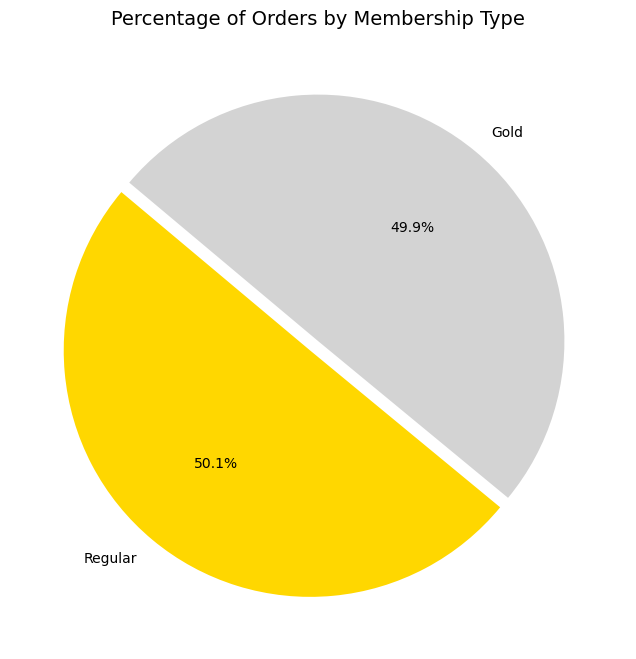

In [12]:
membership_counts = df['membership'].value_counts()
total_orders = len(df)
gold_orders = membership_counts.get('Gold', 0)
gold_percentage = (gold_orders / total_orders) * 100
gold_percentage_rounded = round(gold_percentage)

print(f"Percentage of Gold Orders: {gold_percentage:.2f}%")
print(f"Rounded Percentage: {gold_percentage_rounded}%")

plt.figure(figsize=(8, 8))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['gold', 'lightgrey'], explode=(0.05, 0))
plt.title('Percentage of Orders by Membership Type', fontsize=14)
plt.show()

# Question 8: Which restaurant has the highest average order value but less than 20 total orders?

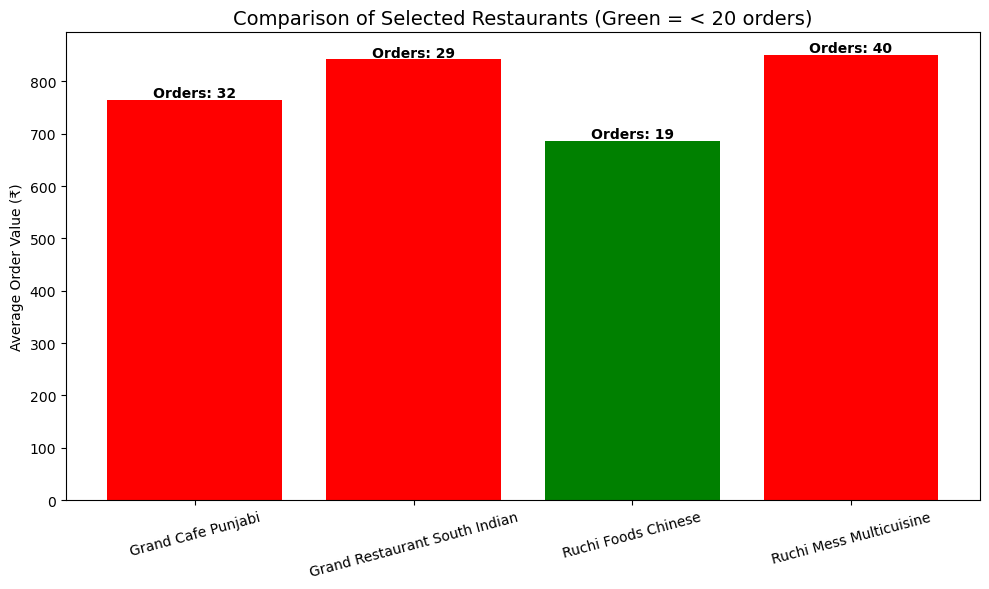

                 restaurant_name_x  total_orders  avg_order_value  \
132             Grand Cafe Punjabi            32       765.409063   
154  Grand Restaurant South Indian            29       842.567586   
254            Ruchi Foods Chinese            19       686.603158   
261        Ruchi Mess Multicuisine            40       851.226250   

     Meets Criteria  
132           False  
154           False  
254            True  
261           False  


In [13]:
options = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess Multicuisine",
    "Ruchi Foods Chinese"
]
res_stats = df.groupby('restaurant_name_x').agg(
    total_orders=('order_id', 'count'),
    avg_order_value=('total_amount', 'mean')
).reset_index()

matching_options = res_stats[res_stats['restaurant_name_x'].isin(options)].copy()
matching_options['Meets Criteria'] = matching_options['total_orders'] < 20

plt.figure(figsize=(10, 6))
colors = ['green' if x < 20 else 'red' for x in matching_options['total_orders']]
bars = plt.bar(matching_options['restaurant_name_x'], matching_options['avg_order_value'], color=colors)

plt.title('Comparison of Selected Restaurants (Green = < 20 orders)', fontsize=14)
plt.ylabel('Average Order Value (₹)')
plt.xticks(rotation=15)
for bar, count in zip(bars, matching_options['total_orders']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'Orders: {count}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(matching_options)

# Question 9: Which combination contributes the highest revenue?

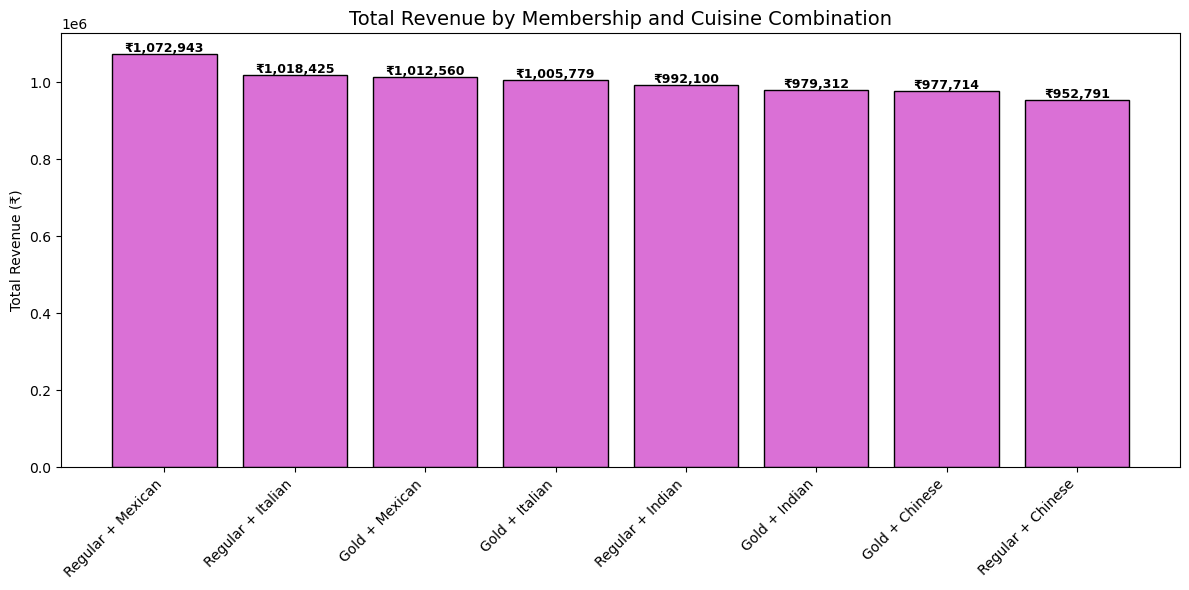

  membership  cuisine  total_amount        combination
7    Regular  Mexican    1072943.30  Regular + Mexican
6    Regular  Italian    1018424.75  Regular + Italian
3       Gold  Mexican    1012559.79     Gold + Mexican
2       Gold  Italian    1005779.05     Gold + Italian
5    Regular   Indian     992100.27   Regular + Indian
1       Gold   Indian     979312.31      Gold + Indian
0       Gold  Chinese     977713.74     Gold + Chinese
4    Regular  Chinese     952790.91  Regular + Chinese


In [14]:
combo_revenue = df.groupby(['membership', 'cuisine'])['total_amount'].sum().reset_index()
combo_revenue['combination'] = combo_revenue['membership'] + " + " + combo_revenue['cuisine']
combo_revenue_sorted = combo_revenue.sort_values(by='total_amount', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(combo_revenue_sorted['combination'], combo_revenue_sorted['total_amount'], color='orchid', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Total Revenue by Membership and Cuisine Combination', fontsize=14)
plt.ylabel('Total Revenue (₹)')
for i, val in enumerate(combo_revenue_sorted['total_amount']):
    plt.text(i, val + 5000, f'₹{val:,.0f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
print(combo_revenue_sorted)

# Question 10: During which quarter of the year is the total revenue highest?

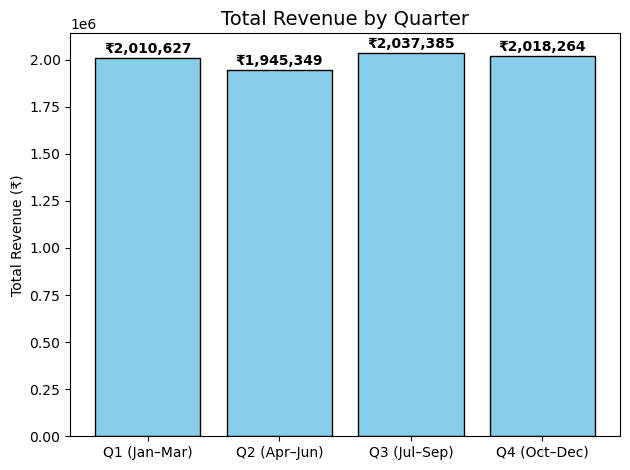

  quarter_label  total_amount
0  Q1 (Jan–Mar)    2010626.64
1  Q2 (Apr–Jun)    1945348.72
2  Q3 (Jul–Sep)    2037385.10
3  Q4 (Oct–Dec)    2018263.66


In [15]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['quarter_num'] = df['order_date'].dt.quarter
quarter_labels_map = {
    1: 'Q1 (Jan–Mar)',
    2: 'Q2 (Apr–Jun)',
    3: 'Q3 (Jul–Sep)',
    4: 'Q4 (Oct–Dec)'
}
df['quarter_label'] = df['quarter_num'].map(quarter_labels_map)
quarterly_revenue = df.groupby(['quarter_num', 'quarter_label'])['total_amount'].sum().reset_index()

plt.bar(quarterly_revenue['quarter_label'], quarterly_revenue['total_amount'], color='skyblue', edgecolor='black')
plt.title('Total Revenue by Quarter', fontsize=14)
plt.ylabel('Total Revenue (₹)')
for i, val in enumerate(quarterly_revenue['total_amount']):
    plt.text(i, val + 10000, f'₹{val:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(quarterly_revenue[['quarter_label', 'total_amount']])

# Section 2

# Q1: How many total orders were placed by users with Gold membership?

In [20]:
gold_orders_count = df[df['membership'] == 'Gold'].shape[0]
print(gold_orders_count)

4987


# Q2: What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?

In [21]:
hyderabad_revenue = df[df['city'] == 'Hyderabad']['total_amount'].sum()
hyderabad_revenue_rounded = round(hyderabad_revenue)
print(f"Total Revenue: {hyderabad_revenue_rounded}")

Total Revenue: 1889367


# Q3: How many distinct users placed at least one order?

In [22]:
distinct_users = df['user_id'].nunique()
print(f"distinct users: {distinct_users}")

distinct users: 2883


# Q4: What is the average order value (rounded to 2 decimals) for Gold members?

In [23]:
gold_df = df[df['membership'] == 'Gold']
avg_order_value_gold = gold_df['total_amount'].mean()
avg_order_value_gold_rounded = round(avg_order_value_gold, 2)
print(avg_order_value_gold_rounded)

797.15


# Q5: How many orders were placed for restaurants with rating ≥ 4.5?

In [24]:
high_rating_orders = df[df['rating'] >= 4.5]
count_high_rating = high_rating_orders.shape[0]

print(count_high_rating)

3374


# Q6: How many orders were placed in the top revenue city among Gold members only?

In [25]:
gold_df = df[df['membership'] == 'Gold']

city_revenue = gold_df.groupby('city')['total_amount'].sum().reset_index()
top_city = city_revenue.loc[city_revenue['total_amount'].idxmax(), 'city']
top_city_gold_orders = gold_df[gold_df['city'] == top_city].shape[0]

print(f"Top Revenue City (Gold): {top_city}")
print(f"Number of orders in {top_city} for Gold members: {top_city_gold_orders}")

Top Revenue City (Gold): Chennai
Number of orders in Chennai for Gold members: 1337
